In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import cv2
import os

In [70]:
train=ImageDataGenerator(rescale=1/255)
validate=ImageDataGenerator(rescale=1/255)

train_dataset=train.flow_from_directory(r'F:\Projects\jasloto\Base-data\training',
                                        target_size=(200,200), batch_size=3, class_mode= 'binary')

validate_dataset=validate.flow_from_directory(r'F:\Projects\jasloto\Base-data\validation',
                                              target_size=(200,200), batch_size=3, class_mode= 'binary')


train_dataset.class_indices

Found 49 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


{'jasmine': 0, 'lotus': 1}

In [71]:
# creating a model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model=Sequential()
model.add(Conv2D(32,3 , activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(32,3 , activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,3 , activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



#complile the model

model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])


#fitting the model

model_fit=model.fit(train_dataset, validation_data=validate_dataset, steps_per_epoch=17, epochs=10 )



Train for 17 steps, validate for 8 steps
Epoch 1/10
17/17 [==============================] - 8s 499ms/step - loss: 4.1237 - accuracy: 0.3878 - val_loss: 0.6262 - val_accuracy: 0.5833
Epoch 2/10
17/17 [==============================] - 7s 422ms/step - loss: 0.6680 - accuracy: 0.5714 - val_loss: 0.4831 - val_accuracy: 0.9167
Epoch 3/10
17/17 [==============================] - 7s 403ms/step - loss: 0.8079 - accuracy: 0.7551 - val_loss: 0.5363 - val_accuracy: 0.6667
Epoch 4/10
17/17 [==============================] - 7s 388ms/step - loss: 0.7334 - accuracy: 0.6735 - val_loss: 0.4022 - val_accuracy: 0.9583
Epoch 5/10
17/17 [==============================] - 6s 380ms/step - loss: 0.4699 - accuracy: 0.8163 - val_loss: 0.9940 - val_accuracy: 0.5000
Epoch 6/10
17/17 [==============================] - 7s 383ms/step - loss: 0.3745 - accuracy: 0.8571 - val_loss: 0.1462 - val_accuracy: 0.9583
Epoch 7/10
17/17 [==============================] - 7s 383ms/step - loss: 0.2894 - accuracy: 0.9388 - val_l

In [72]:
#saving the model

model.save('jasloto.h5')
print('model saved into disk')

model saved into disk


In [73]:
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 33856)           

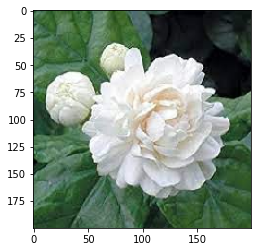

jasmine


In [13]:
# prediction



test_image = image.load_img(r'C:\Users\MarchMelody\Desktop\testing\js.jpg', target_size = (200,200))
plt.imshow(test_image)
plt.show()

a = image.img_to_array(test_image)
b = np.expand_dims(a , axis = 0)


# loading the model

loadmodel=tf.keras.models.load_model('F:\Jupyter Notebook\jasloto.h5')

result = loadmodel.predict(b)

if result[0][0] == 0:
    print ('jasmine')

else:
    print ('lotus')